In [16]:
# standard ML library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,18)})

# tambahan
#import plotly.express as px

# Preprocess
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#from sklearn.decomposition import PCA
#import category_encoders as ce

# Tuning
from sklearn.model_selection import StratifiedShuffleSplit

# models
# We use a utility to generate artificial classification data.
from sklearn.svm import SVC

In [34]:
df = pd.read_csv('final_dataset_ppn.csv')
df.head()

,Nomor Putusan,Jenis Pajak,Tahun Pajak,DV_Menang,case_circumstances,government_statement,taxpayer_statement,court_statement,court_considerants,case_contents,...,government_statement_bow_assigned_topic,government_statement_bow_prob_topic_0,government_statement_bow_prob_topic_1,government_statement_bow_prob_topic_2,government_statement_bow_prob_topic_3,government_statement_bow_prob_topic_4,court_statement_bow_assigned_topic,court_statement_bow_prob_topic_0,court_statement_bow_prob_topic_1,court_statement_bow_prob_topic_2
0,Put.072196.16.pdf,PPN dan PPnBM,2007,0,bahwa nilai sengketa dalam sengketa banding in...,bahwa terbanding melakukan koreksi atas transa...,bahwa bukti yang pemohon banding sampaikan jel...,menurut majelis : bahwa yang menjadi sengketa ...,bahwa dalam sengketa banding ini tidak terdapa...,bahwa nilai sengketa dalam sengketa banding in...,...,0,0.798866,0.050097,0.050001,0.050836,0.050200,0,0.588846,0.409995,0.001159
1,Put.101125.16.pdf,PPN dan PPnBM,2012,0,bahwa nilai sengketa terbukti dalam sengketa b...,bahwa koreksi terbanding telah sesuai dengan k...,bahwa pemohon banding tidak setuju dengan alas...,menurut majelis : bahwa berdasarkan pemeriksaa...,"bahwa berdasarkan uraian tersebut di atas, rek...",bahwa nilai sengketa terbukti dalam sengketa b...,...,0,0.050010,0.050007,0.050039,0.799938,0.050007,2,0.001000,0.000969,0.998031
2,Put.101126.16.pdf,PPN dan PPnBM,2012,0,bahwa nilai sengketa terbukti dalam sengketa b...,bahwa koreksi pemeriksa telah sesuai dengan ke...,bahwa pemohon banding tidak setuju dengan alas...,menurut majelis : bahwa berdasarkan pemeriksaa...,"bahwa berdasarkan uraian tersebut di atas, rek...",bahwa nilai sengketa terbukti dalam sengketa b...,...,0,0.050010,0.050007,0.050039,0.799938,0.050007,2,0.001000,0.000969,0.998031
3,Put.101736.16.pdf,PPN dan PPnBM,2011,0,koreksi pajak masukan masa pajak november 2011...,bahwa berdasarkan lhp dan kkp dijelaskan bahwa...,bahwa pemohon banding tidak setuju dengan kore...,menurut majelis : bahwa yang menjadi sengketa ...,bahwa atas hasil pemeriksaan dalam persidangan...,koreksi pajak masukan masa pajak november 2011...,...,0,0.205988,0.003847,0.003939,0.388468,0.397757,0,0.822832,0.175909,0.001258
4,Put.104707.16.pdf,PPN dan PPnBM,2011,0,bahwa yang menjadi pokok sengketa dalam sengke...,bahwa terbanding keberatan menolak keberatan w...,bahwa pemohon banding tidak setuju terhadap al...,menurut majelis : bahwa berdasarkan pemeriksaa...,bahwa dalam sengketa banding ini tidak terdapa...,bahwa yang menjadi pokok sengketa dalam sengke...,...,0,0.029002,0.029533,0.028653,0.028603,0.884210,2,0.001230,0.001167,0.997603


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Nomor Putusan                            66 non-null     object 
 1   Jenis Pajak                              66 non-null     object 
 2   Tahun Pajak                              66 non-null     int64  
 3   DV_Menang                                66 non-null     int64  
 4   case_circumstances                       66 non-null     object 
 5   government_statement                     66 non-null     object 
 6   taxpayer_statement                       66 non-null     object 
 7   court_statement                          66 non-null     object 
 8   court_considerants                       66 non-null     object 
 9   case_contents                            66 non-null     object 
 10  case_main_contents                       66 non-null

In [36]:
features = list(df.columns[df.columns.str.contains("_prob_topic_")])
features

['taxpayer_statement_bow_prob_topic_0',
 'taxpayer_statement_bow_prob_topic_1',
 'taxpayer_statement_bow_prob_topic_2',
 'taxpayer_statement_bow_prob_topic_3',
 'taxpayer_statement_bow_prob_topic_4',
 'government_statement_bow_prob_topic_0',
 'government_statement_bow_prob_topic_1',
 'government_statement_bow_prob_topic_2',
 'government_statement_bow_prob_topic_3',
 'government_statement_bow_prob_topic_4',
 'court_statement_bow_prob_topic_0',
 'court_statement_bow_prob_topic_1',
 'court_statement_bow_prob_topic_2']

In [37]:
X=df[features]
X

,taxpayer_statement_bow_prob_topic_0,taxpayer_statement_bow_prob_topic_1,taxpayer_statement_bow_prob_topic_2,taxpayer_statement_bow_prob_topic_3,taxpayer_statement_bow_prob_topic_4,government_statement_bow_prob_topic_0,government_statement_bow_prob_topic_1,government_statement_bow_prob_topic_2,government_statement_bow_prob_topic_3,government_statement_bow_prob_topic_4,court_statement_bow_prob_topic_0,court_statement_bow_prob_topic_1,court_statement_bow_prob_topic_2
0,0.698553,0.018197,0.018614,0.018536,0.246100,0.798866,0.050097,0.050001,0.050836,0.050200,0.588846,0.409995,0.001159
1,0.926532,0.018364,0.018235,0.018404,0.018465,0.050010,0.050007,0.050039,0.799938,0.050007,0.001000,0.000969,0.998031
2,0.926524,0.018366,0.018235,0.018407,0.018468,0.050010,0.050007,0.050039,0.799938,0.050007,0.001000,0.000969,0.998031
3,0.004800,0.004782,0.004777,0.004836,0.980806,0.205988,0.003847,0.003939,0.388468,0.397757,0.822832,0.175909,0.001258
4,0.938158,0.015474,0.015404,0.015475,0.015489,0.029002,0.029533,0.028653,0.028603,0.884210,0.001230,0.001167,0.997603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.050109,0.050001,0.050001,0.799886,0.050003,0.020234,0.020001,0.020024,0.919740,0.020001,0.001482,0.001482,0.997036
62,0.050109,0.050001,0.050001,0.799886,0.050003,0.022240,0.911073,0.022230,0.022222,0.022234,0.001456,0.001456,0.997088
63,0.050109,0.050001,0.050001,0.799886,0.050003,0.022239,0.911074,0.022230,0.022222,0.022234,0.001437,0.001437,0.997126
64,0.050109,0.050001,0.050001,0.799886,0.050003,0.022239,0.911074,0.022230,0.022222,0.022234,0.001437,0.001437,0.997126


In [38]:
y=df['DV_Menang']
y

0     0
1     0
2     0
3     0
4     0
     ..
61    0
62    0
63    0
64    0
65    0
Name: DV_Menang, Length: 66, dtype: int64

In [39]:
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score


TRAIN: [63  4 64 51 45 61 11 54 48 65 41 29 20 23  7  2 33 38 22 52 36 57  5 27
 19 37  8 60 31 43 17 14 46 39 42 56 40 21 10 13 28 24 26 44 59 12] TEST: [15 62 32 35 34  1 50 16 58 25  0 30  6 47 49  3  9 18 53 55]
accuracy of SVC model 1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



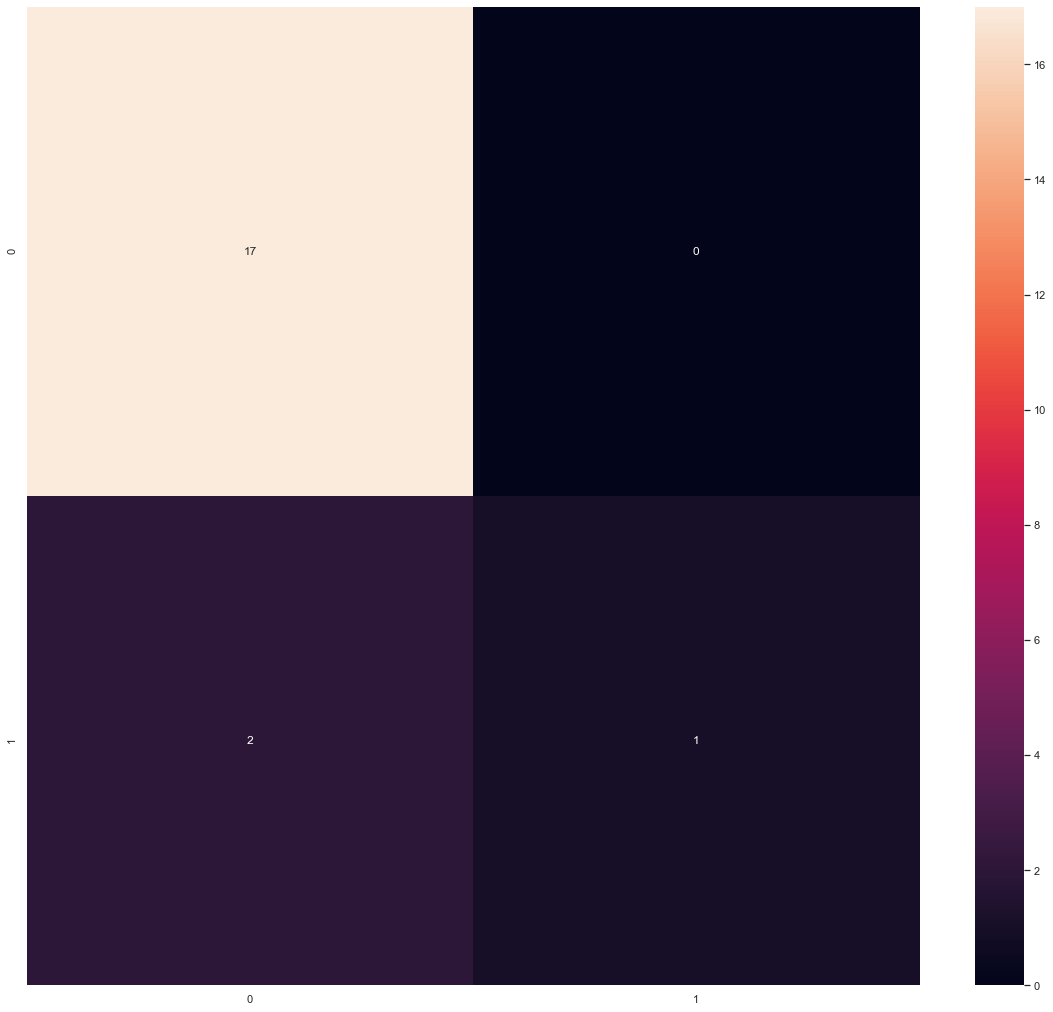

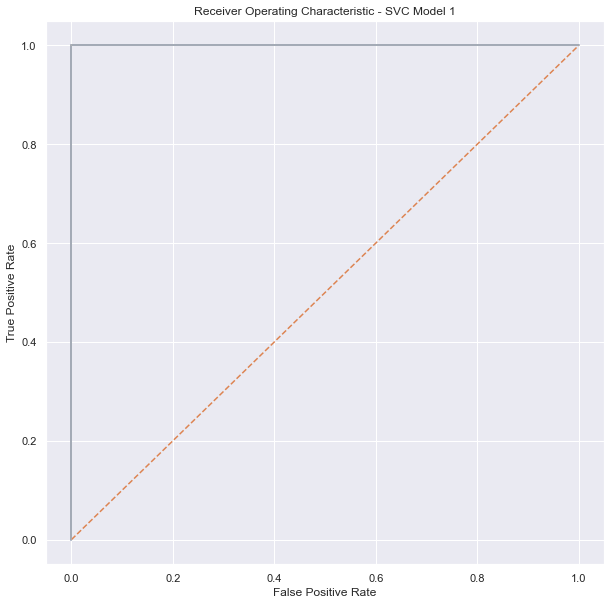

AUC of the ROC Curve for model 1: 1.0


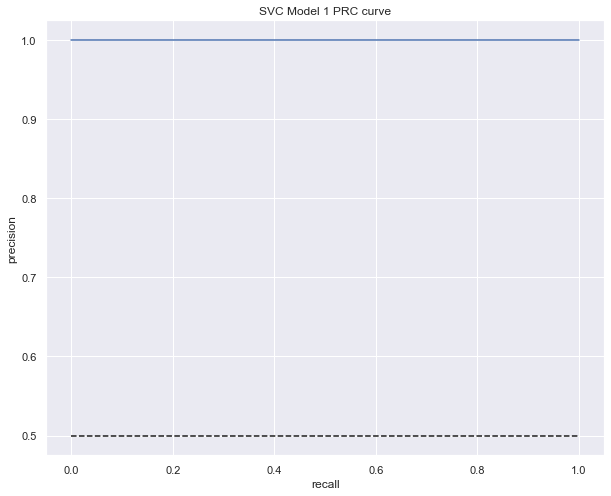

AUC of PRC Curve for SVC Model 1: 1.0
TRAIN: [39 55 30 53 49 56 58  0 15 32 35 60 50 45 26 48 42 63 36 12 61 43 64 62
 44  5 59  9 19 13 25  7 41 24 11 22 65  6 23 18  4  8 54 37 40 34] TEST: [14 46 29 52 27 47 17 33  2 10  3  1 28 38 20 16 31 57 51 21]
accuracy of SVC model 2: 0.9
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.67      0.67      0.67         3

    accuracy                           0.90        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.90      0.90      0.90        20



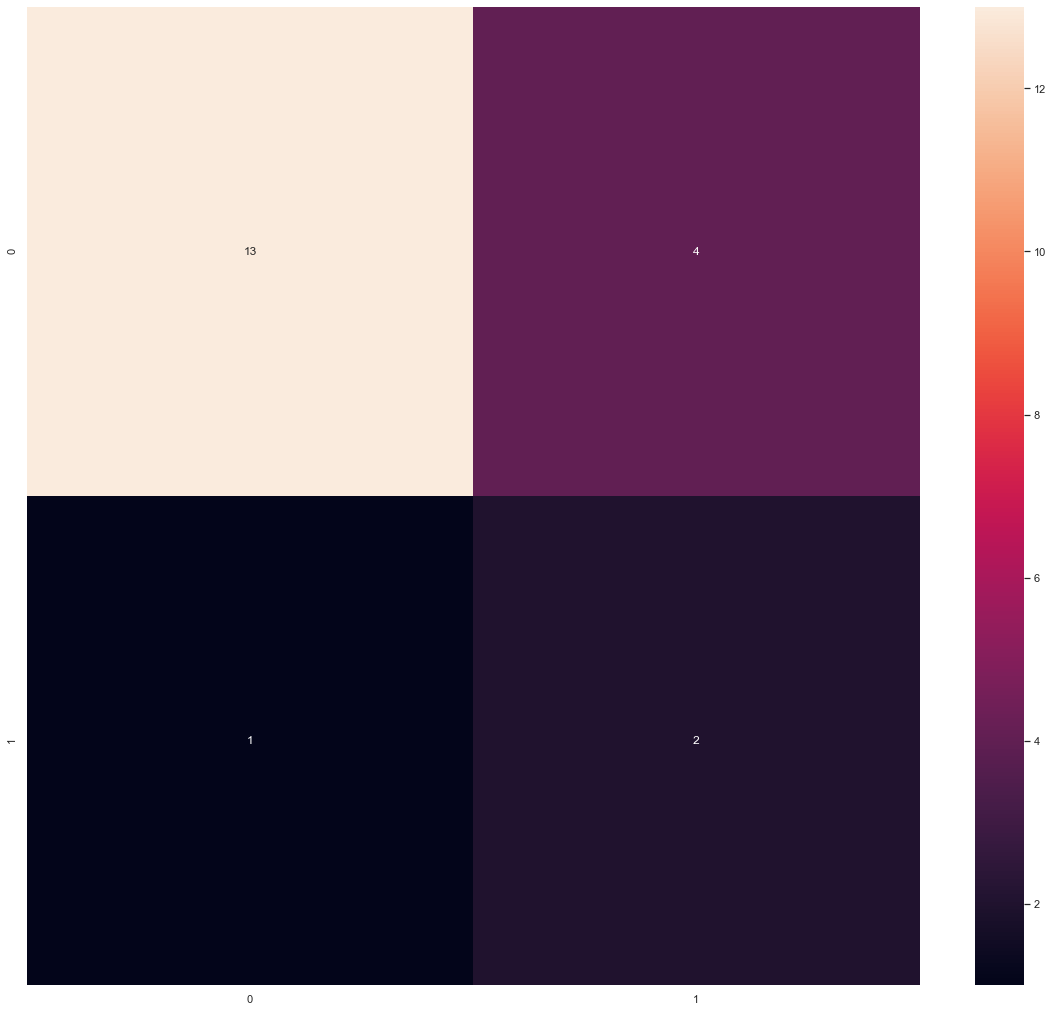

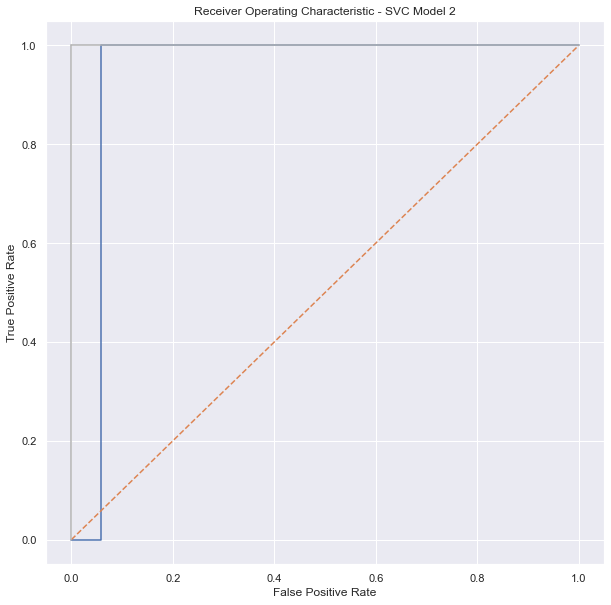

AUC of the ROC Curve for model 2: 0.9411764705882353


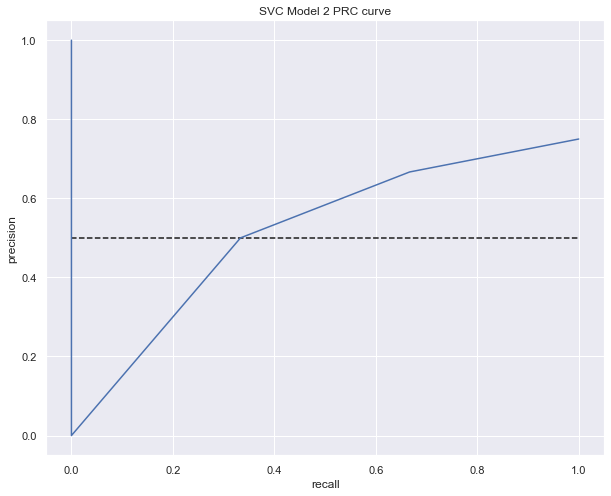

AUC of PRC Curve for SVC Model 2: 0.5138888888888888
TRAIN: [29 30  9 60 18 33 13 35  4 62 32 15 23  6 40 31 21 44 26 41 14 20 43 63
  7 22 34 58 57 37 64 61 54 59 49 52 16 10 24 42 53 48  2 39 55 19] TEST: [17 11  1 46  0 65 28  3 47 36  5 25 56 51  8 38 50 45 27 12]
accuracy of SVC model 3: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



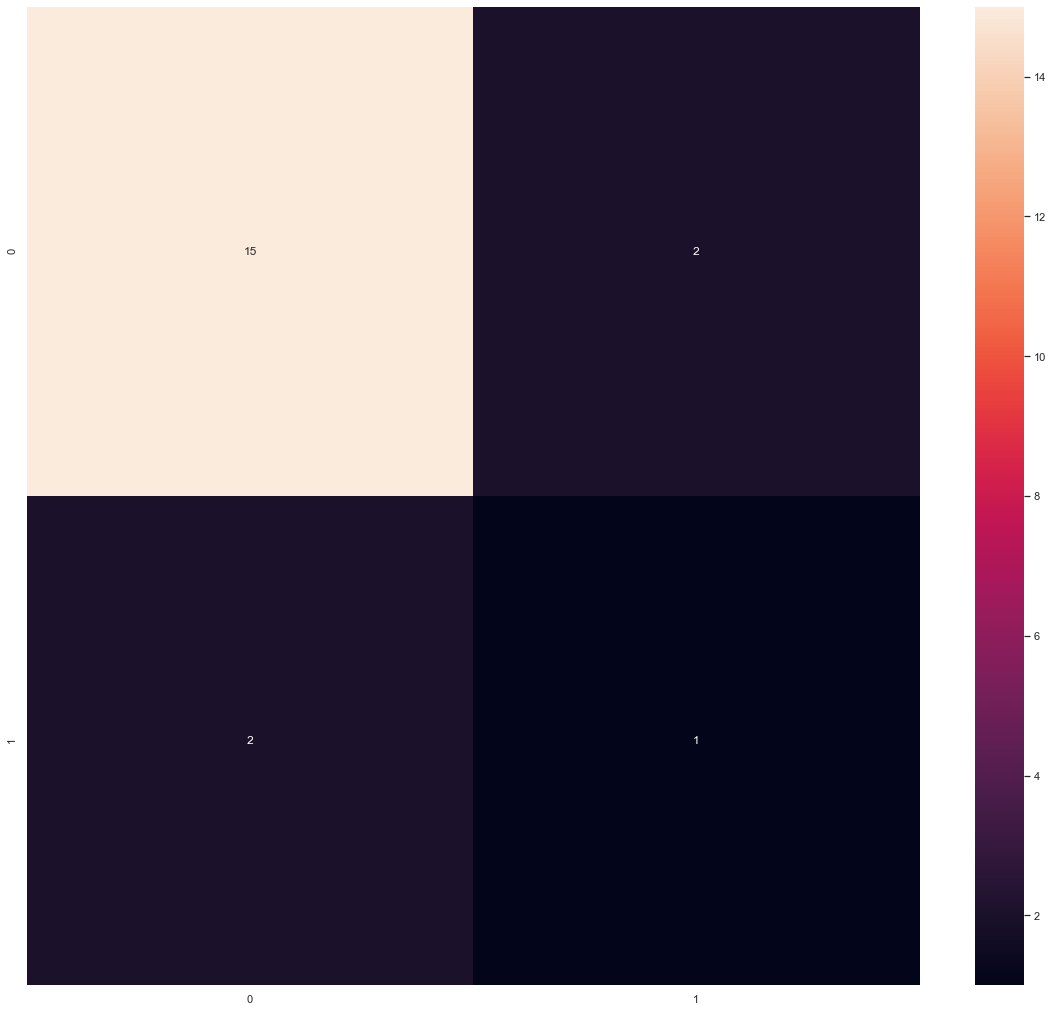

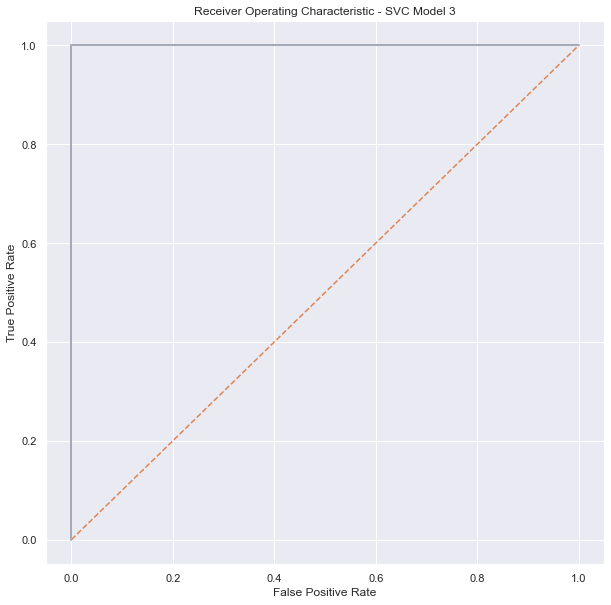

AUC of the ROC Curve for model 3: 1.0


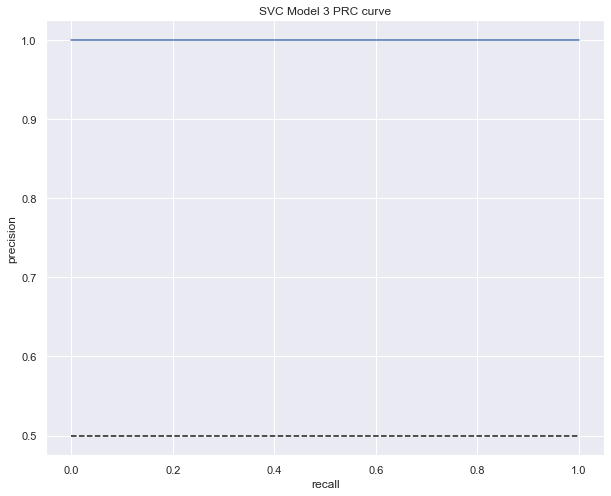

AUC of PRC Curve for SVC Model 3: 1.0
TRAIN: [12 40  1 54  0 50  5 39 47 42 14 37 26  3  9 53 43 44 58 38 25 60 55 45
 35 23 64 13 57 21 30 51 16 48 18 49 11 32 56 29  4 61 17 52 41 10] TEST: [62 20 31 15 36 27 33  2 19 65 28 59  8 34  7 22 46 63  6 24]
accuracy of SVC model 4: 0.9
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.67      0.67      0.67         3

    accuracy                           0.90        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.90      0.90      0.90        20



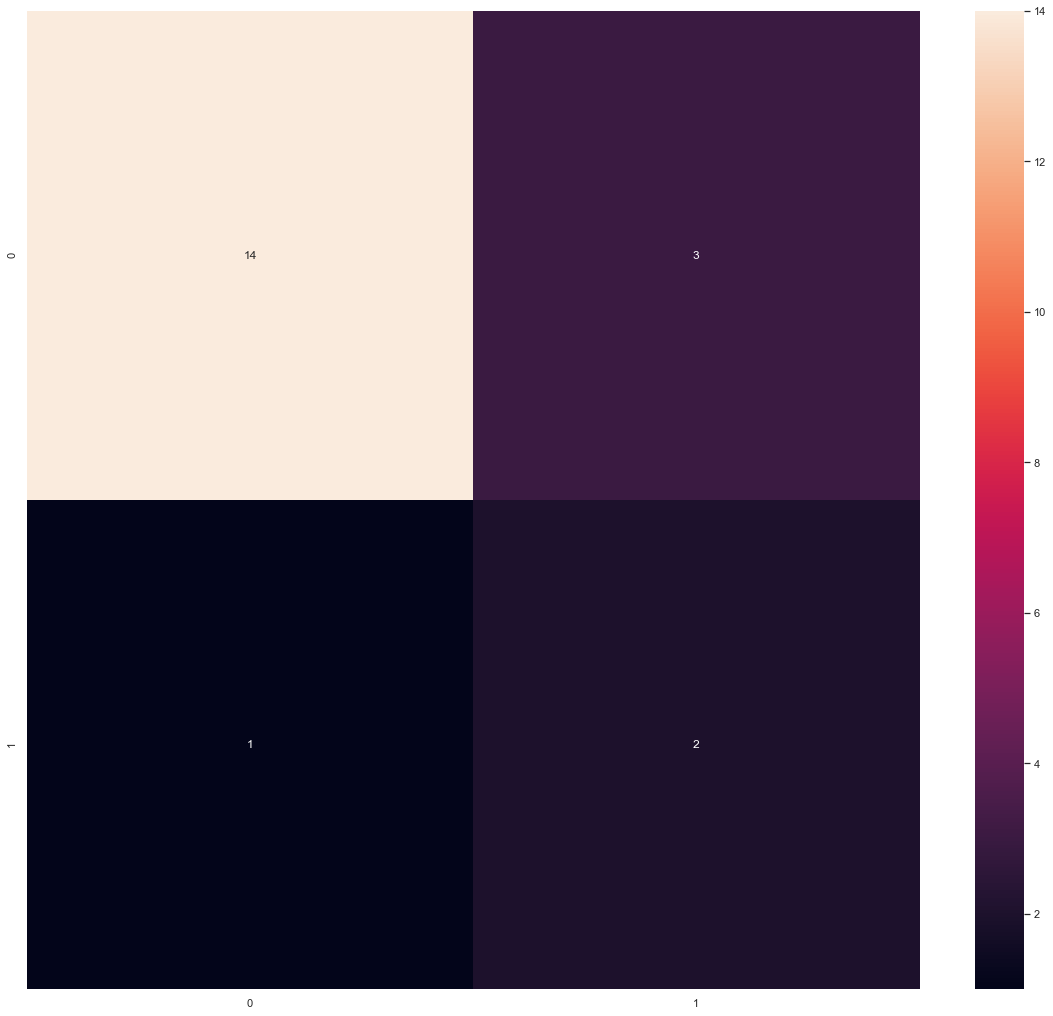

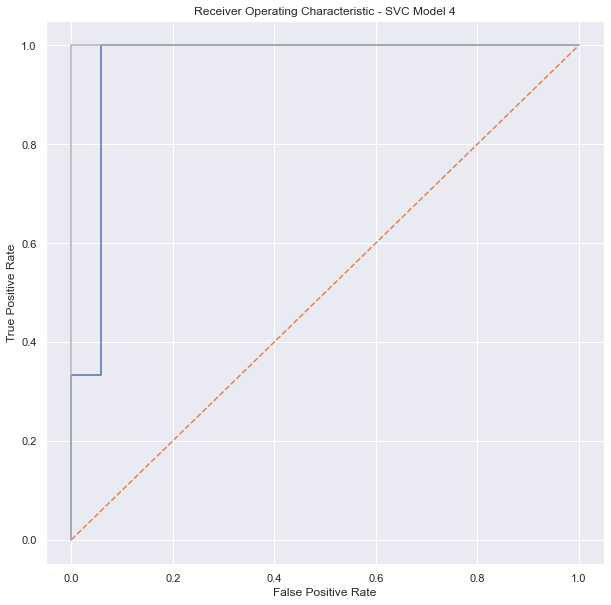

AUC of the ROC Curve for model 4: 0.9607843137254902


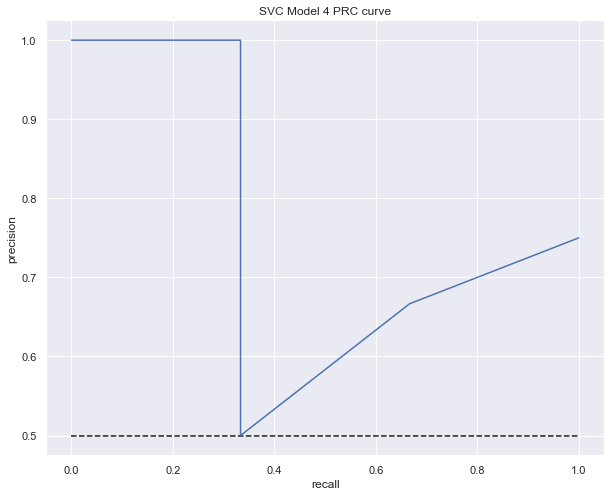

AUC of PRC Curve for SVC Model 4: 0.7638888888888888
TRAIN: [14 11 43 45  0 39 26 33 34 41 10 32 60 42 24 53 19 21 54 27 13 64 50 49
  8 63 23  7 57 35 48 12 30  1 65 29 18 51 59 36  3 17 25 37  5  9] TEST: [16 58  2 22 31  4 61  6 40 56 52 28 15 47 20 38 44 62 46 55]
accuracy of SVC model 5: 0.9
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.67      0.67      0.67         3

    accuracy                           0.90        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.90      0.90      0.90        20



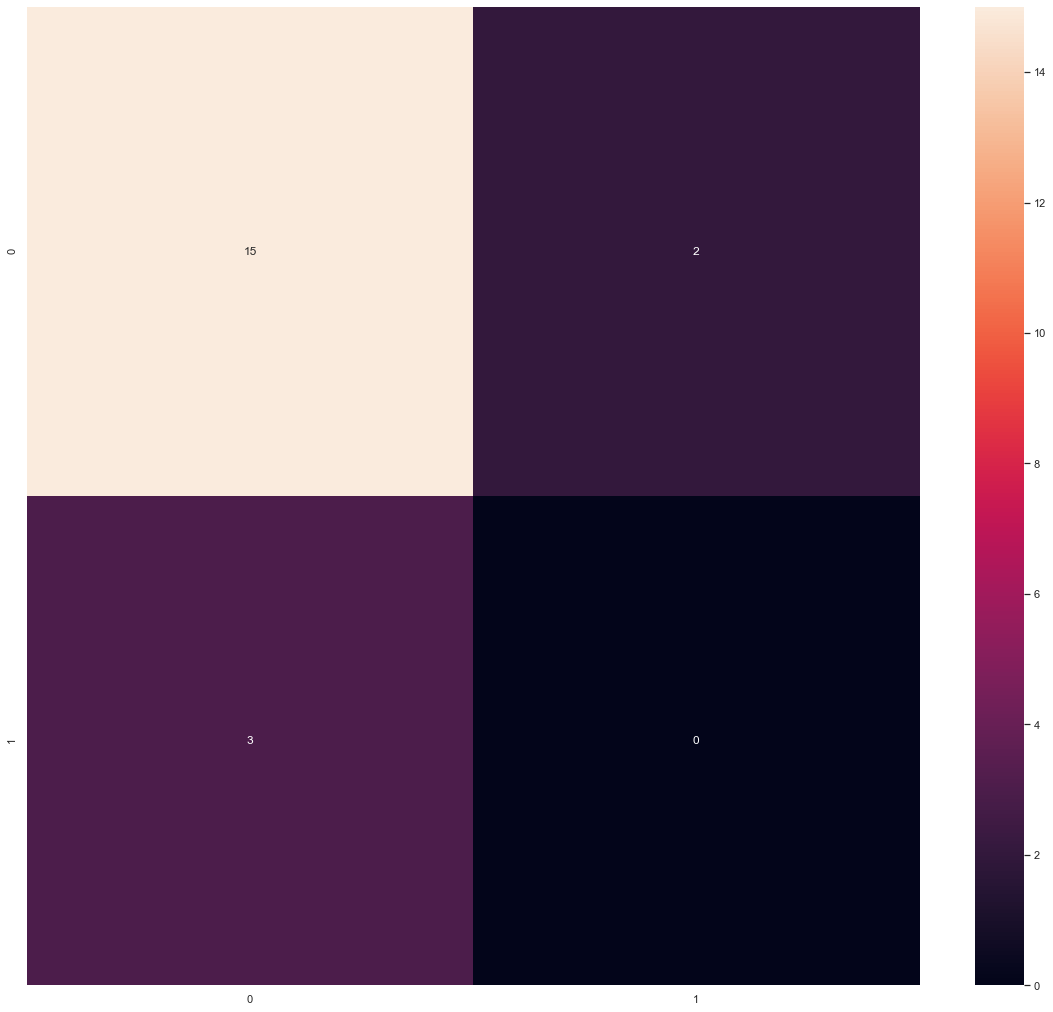

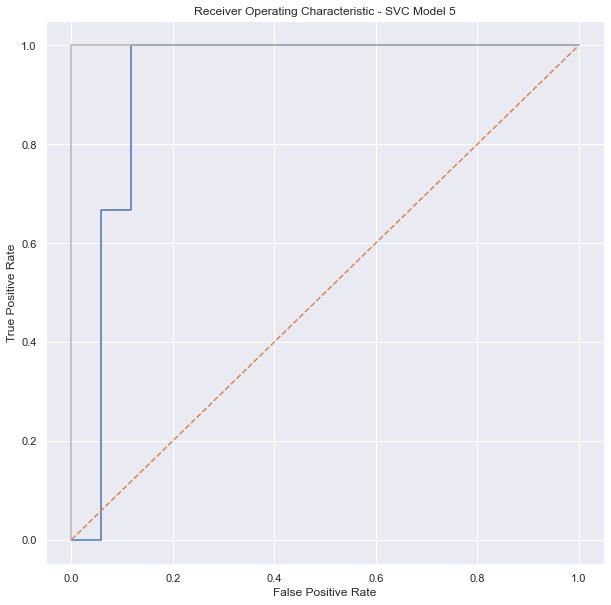

AUC of the ROC Curve for model 5: 0.9215686274509803


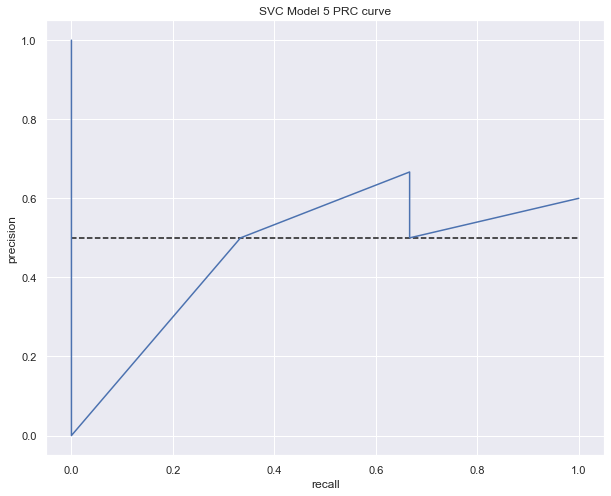

AUC of PRC Curve for SVC Model 5: 0.4611111111111111


In [48]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
mod_count=1
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = SVC(gamma='auto', probability=True, kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('accuracy of SVC model {}: {}'.format(mod_count, model.score(X_test, y_test)))
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt="d")
    print(classification_report(y_test, model.predict(X_test)))
    
    #ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - SVC Model {}'.format(mod_count))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print("AUC of the ROC Curve for model {}: {}".format(mod_count,roc_auc_score(y_test, y_pred_proba)))
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    plt.figure(figsize = (10,8))
    plt.plot([0, 1], [0.5, 0.5],'k--')
    plt.plot(recall, precision, label = 'SVC Model {}'.format(mod_count))
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('SVC Model {} PRC curve'.format(mod_count))
    plt.show()
    
    # calculate precision-recall AUC
    auc_prc = auc(recall, precision)
    print('AUC of PRC Curve for SVC Model {}: {}'.format(mod_count,auc_prc))
    
    #save model
    filename = 'SVC_model_{}.sav'.format(mod_count)
    pickle.dump(clf, open(filename, 'wb'))
    
    mod_count+=1

In [50]:
model_selected = pickle.load(open('SVC_model_4.sav', 'rb'))
model_selected.coef_

array([[-0.36800151,  1.23247106,  0.11327862, -0.96469027, -0.01305798,
        -1.54259323, -0.0240441 ,  0.67043812,  1.23695821, -0.34075897,
        -0.40668551,  1.12333047, -0.71664508]])

TRAIN: [63  4 64 51 45 61 11 54 48 65 41 29 20 23  7  2 33 38 22 52 36 57  5 27
 19 37  8 60 31 43 17 14 46 39 42 56 40 21 10 13 28 24 26 44 59 12] TEST: [15 62 32 35 34  1 50 16 58 25  0 30  6 47 49  3  9 18 53 55]
accuracy of SVC model 1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



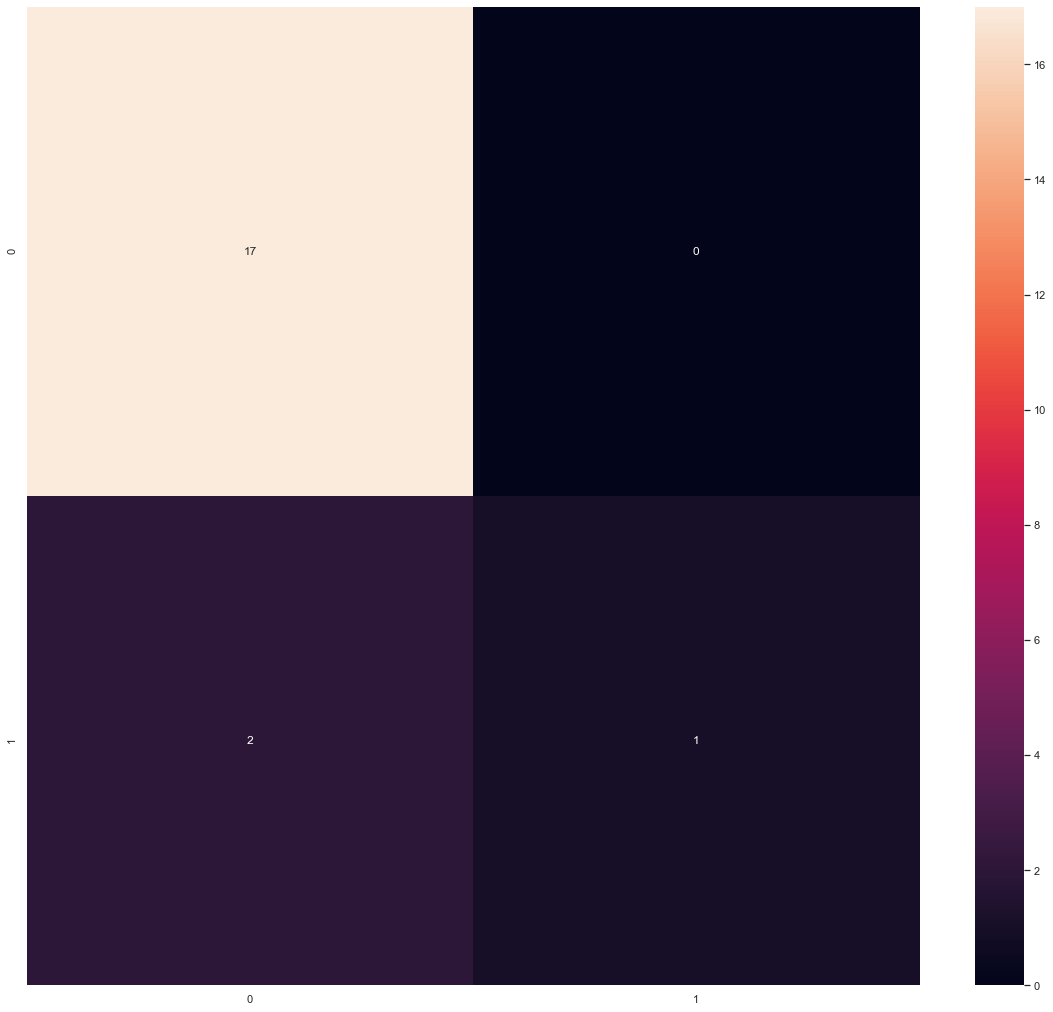

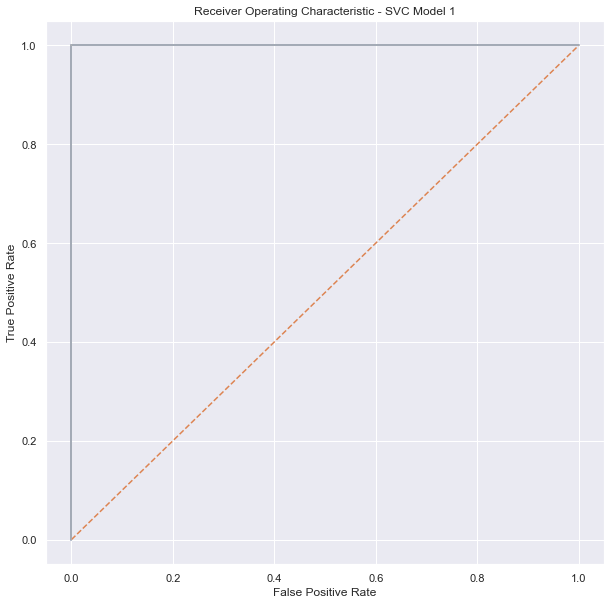

AUC of the ROC Curve for model 1: 1.0


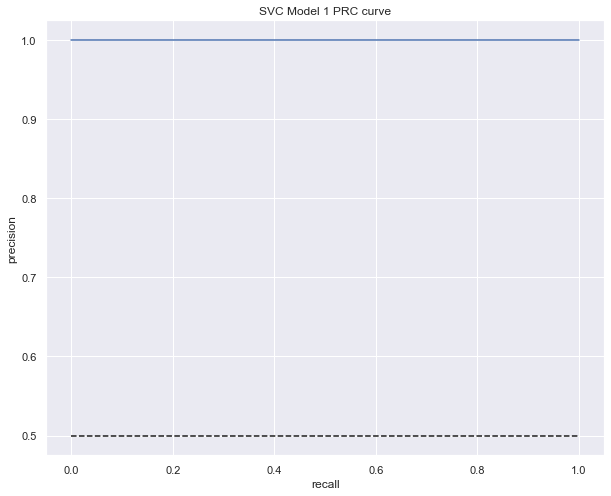

AUC of PRC Curve for SVC Model 1: 1.0
TRAIN: [39 55 30 53 49 56 58  0 15 32 35 60 50 45 26 48 42 63 36 12 61 43 64 62
 44  5 59  9 19 13 25  7 41 24 11 22 65  6 23 18  4  8 54 37 40 34] TEST: [14 46 29 52 27 47 17 33  2 10  3  1 28 38 20 16 31 57 51 21]
accuracy of SVC model 2: 0.9
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.67      0.67      0.67         3

    accuracy                           0.90        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.90      0.90      0.90        20



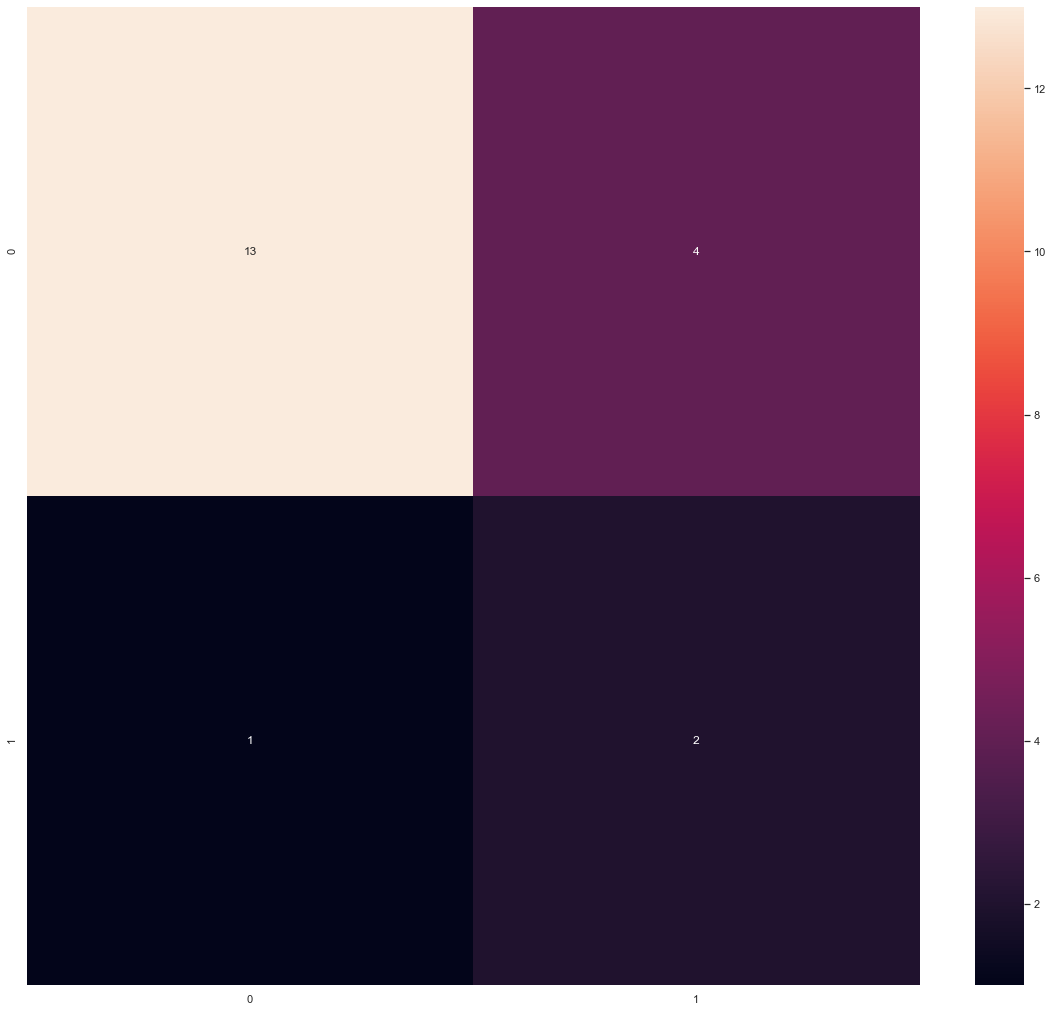

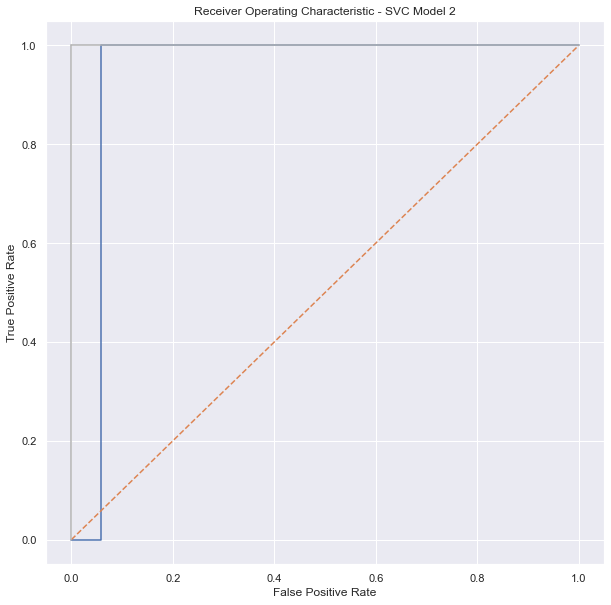

AUC of the ROC Curve for model 2: 0.9411764705882353


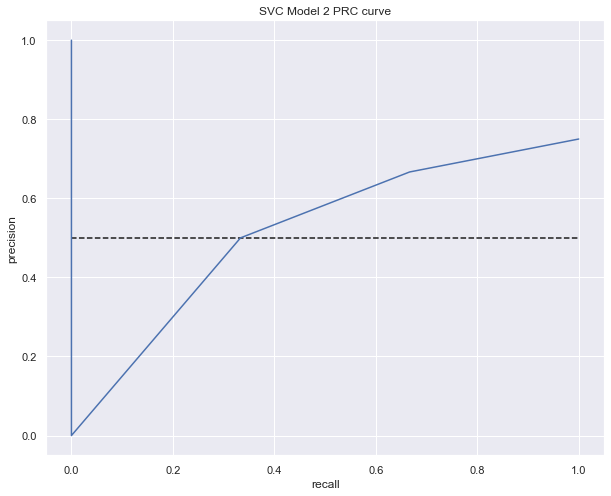

AUC of PRC Curve for SVC Model 2: 0.5138888888888888
TRAIN: [29 30  9 60 18 33 13 35  4 62 32 15 23  6 40 31 21 44 26 41 14 20 43 63
  7 22 34 58 57 37 64 61 54 59 49 52 16 10 24 42 53 48  2 39 55 19] TEST: [17 11  1 46  0 65 28  3 47 36  5 25 56 51  8 38 50 45 27 12]
accuracy of SVC model 3: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



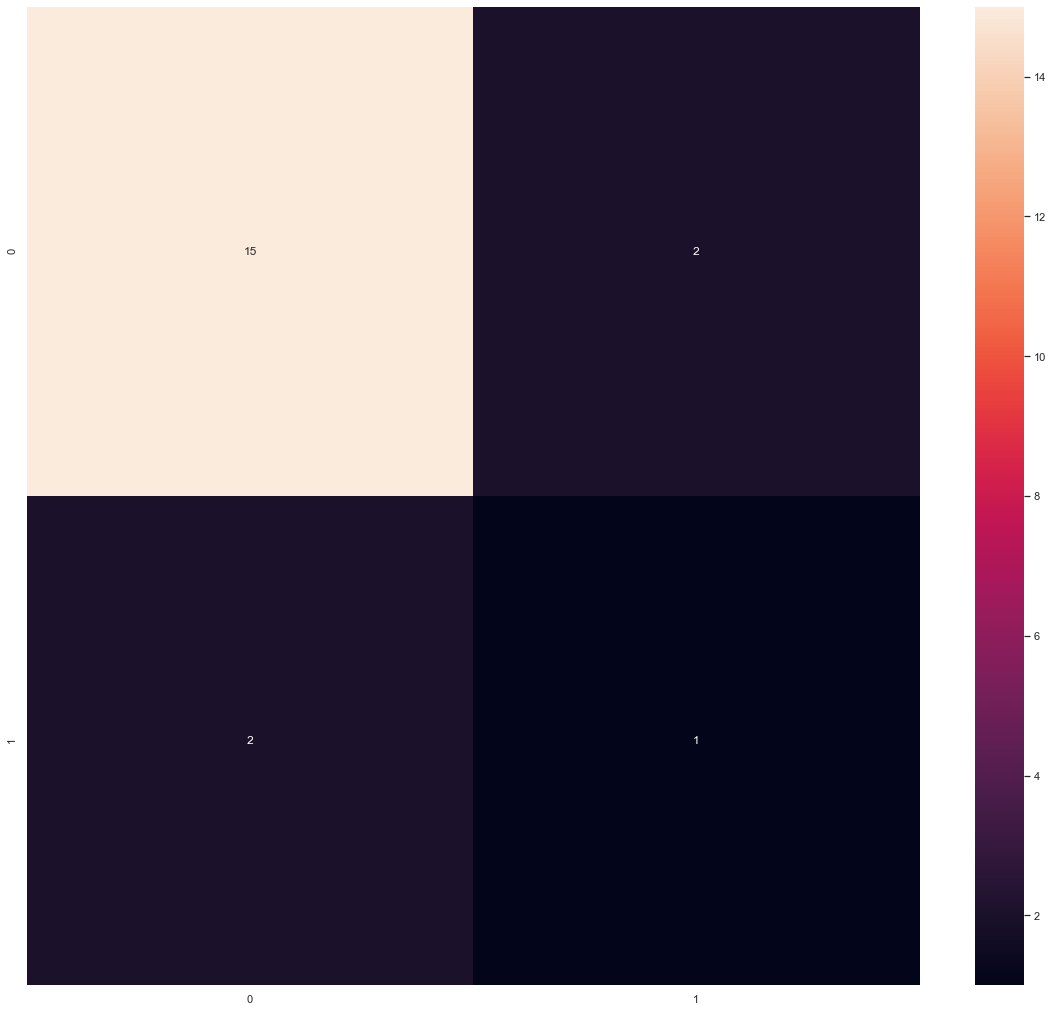

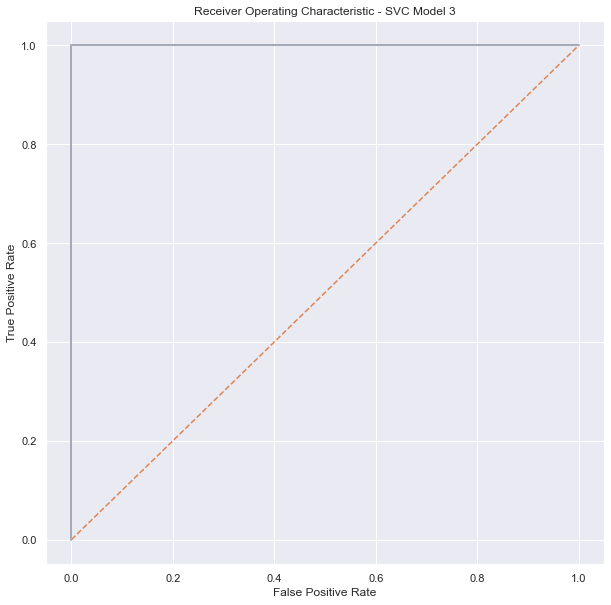

AUC of the ROC Curve for model 3: 1.0


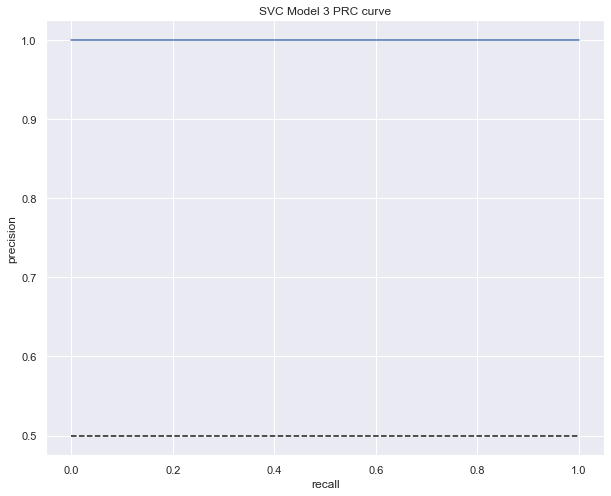

AUC of PRC Curve for SVC Model 3: 1.0
TRAIN: [12 40  1 54  0 50  5 39 47 42 14 37 26  3  9 53 43 44 58 38 25 60 55 45
 35 23 64 13 57 21 30 51 16 48 18 49 11 32 56 29  4 61 17 52 41 10] TEST: [62 20 31 15 36 27 33  2 19 65 28 59  8 34  7 22 46 63  6 24]
accuracy of SVC model 4: 0.9
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.67      0.67      0.67         3

    accuracy                           0.90        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.90      0.90      0.90        20



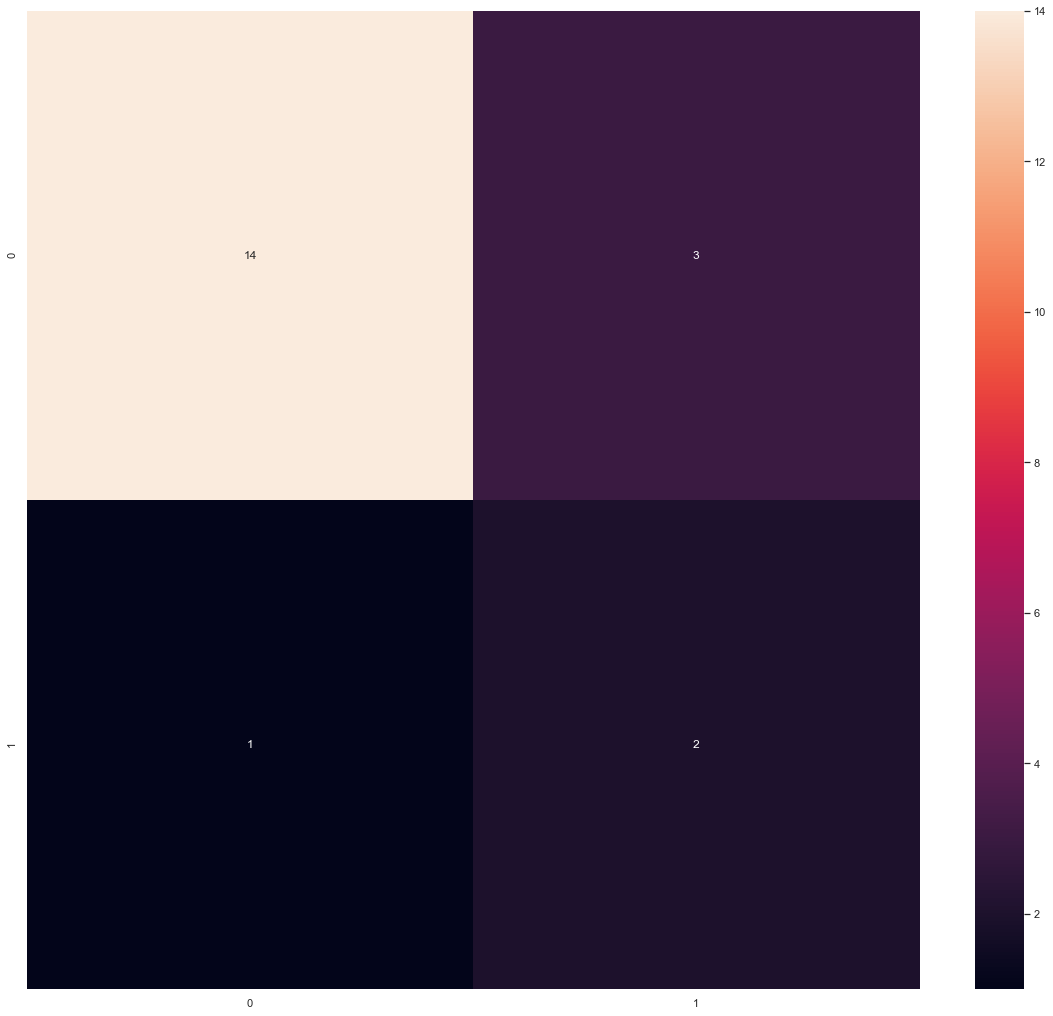

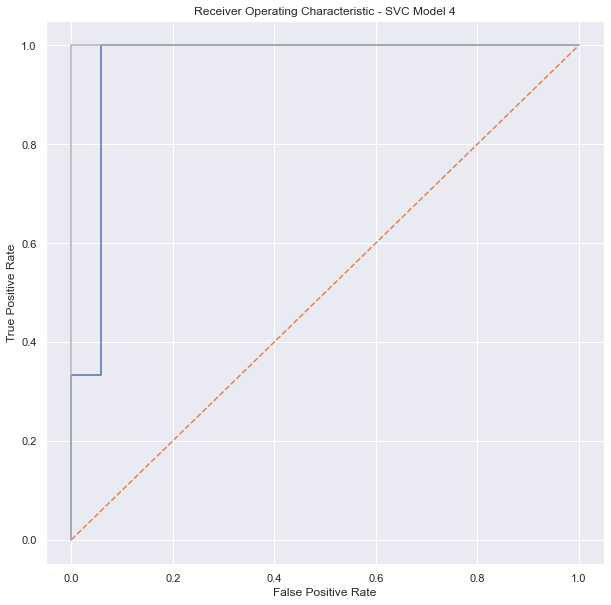

AUC of the ROC Curve for model 4: 0.9607843137254902


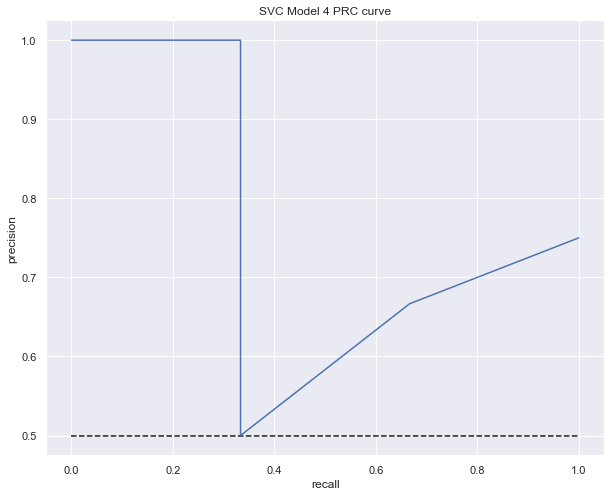

AUC of PRC Curve for SVC Model 4: 0.7638888888888888
TRAIN: [14 11 43 45  0 39 26 33 34 41 10 32 60 42 24 53 19 21 54 27 13 64 50 49
  8 63 23  7 57 35 48 12 30  1 65 29 18 51 59 36  3 17 25 37  5  9] TEST: [16 58  2 22 31  4 61  6 40 56 52 28 15 47 20 38 44 62 46 55]
accuracy of SVC model 5: 0.9
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.67      0.67      0.67         3

    accuracy                           0.90        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.90      0.90      0.90        20



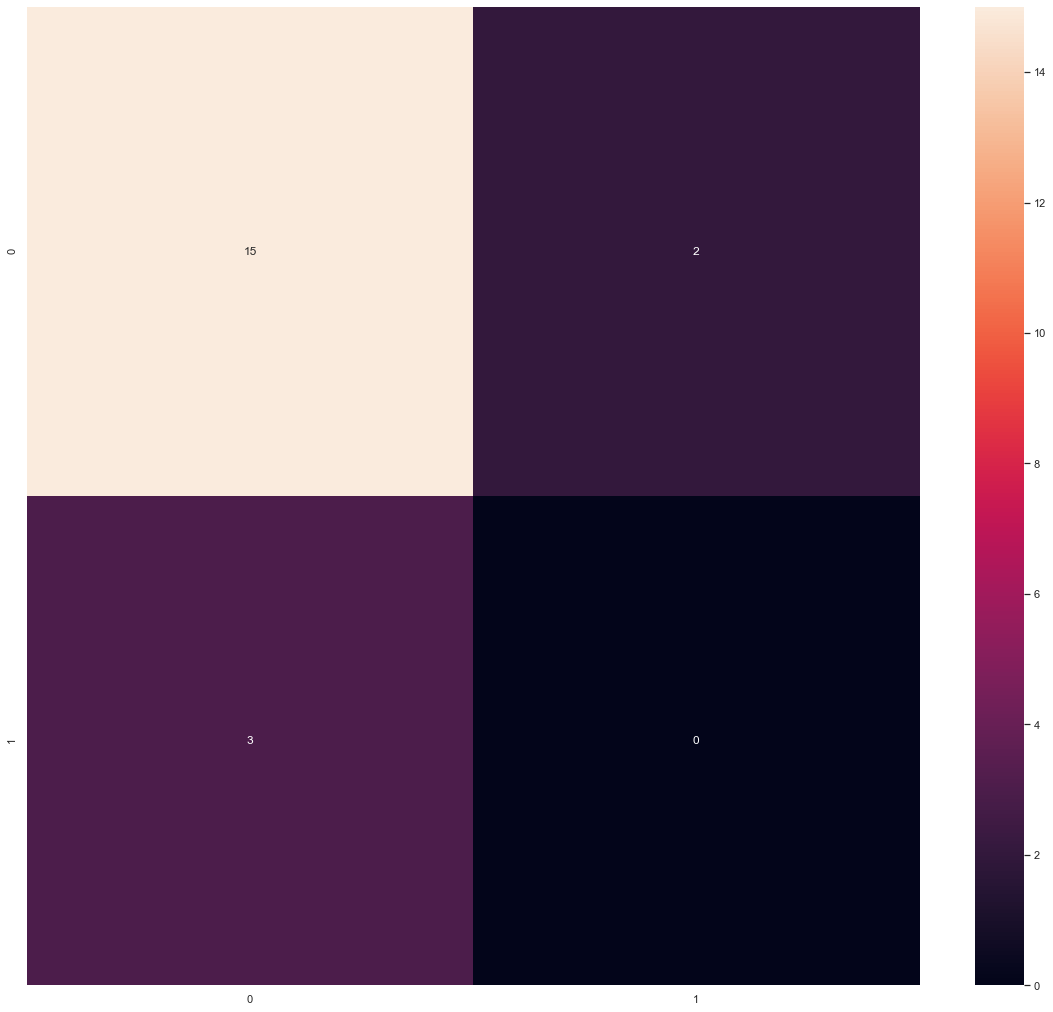

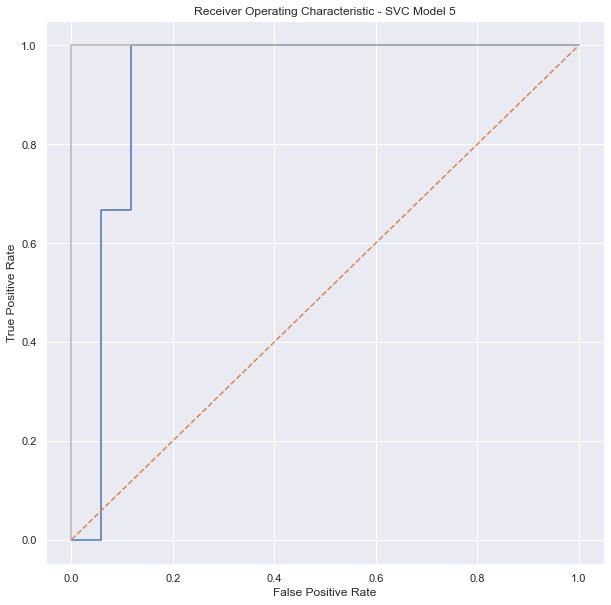

AUC of the ROC Curve for model 5: 0.9215686274509803


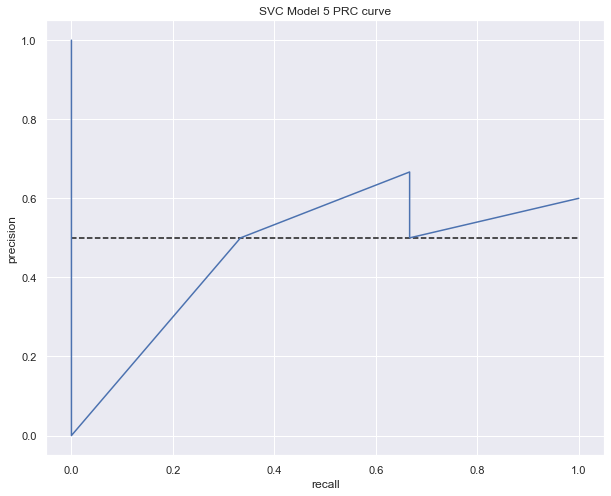

AUC of PRC Curve for SVC Model 5: 0.4611111111111111


In [51]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
mod_count=1
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = SVC(gamma='auto', probability=True, kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('accuracy of SVC model {}: {}'.format(mod_count, model.score(X_test, y_test)))
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt="d")
    print(classification_report(y_test, model.predict(X_test)))
    
    #ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - SVC Model {}'.format(mod_count))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print("AUC of the ROC Curve for model {}: {}".format(mod_count,roc_auc_score(y_test, y_pred_proba)))
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    plt.figure(figsize = (10,8))
    plt.plot([0, 1], [0.5, 0.5],'k--')
    plt.plot(recall, precision, label = 'SVC Model {}'.format(mod_count))
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('SVC Model {} PRC curve'.format(mod_count))
    plt.show()
    
    # calculate precision-recall AUC
    auc_prc = auc(recall, precision)
    print('AUC of PRC Curve for SVC Model {}: {}'.format(mod_count,auc_prc))
    
    #save model
    filename = 'SVC_PPN_model_{}.sav'.format(mod_count)
    pickle.dump(clf, open(filename, 'wb'))
    
    mod_count+=1

In [52]:
model_selected = pickle.load(open('SVC_model_4.sav', 'rb'))
model_selected.coef_

array([[-0.36800151,  1.23247106,  0.11327862, -0.96469027, -0.01305798,
        -1.54259323, -0.0240441 ,  0.67043812,  1.23695821, -0.34075897,
        -0.40668551,  1.12333047, -0.71664508]])